In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np


# load data
# df = pd.read_csv("C:\\Users\\Affinity\\Google 드라이브\\project\\football-events\\events.csv")
df = pd.read_csv("/content/drive/My Drive/project/football-events/events.csv")
df.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


In [0]:
# series(df.text) to list
text_list = df[:100000].text.tolist()
text_list[:5]

['Attempt missed. Mladen Petric (Hamburg) left footed shot from the left side of the box is high and wide to the left. Assisted by Gokhan Tore.',
 'Corner,  Borussia Dortmund. Conceded by Dennis Diekmeier.',
 'Corner,  Borussia Dortmund. Conceded by Heiko Westermann.',
 'Foul by Sven Bender (Borussia Dortmund).',
 'Gokhan Tore (Hamburg) wins a free kick in the defensive half.']

In [0]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re


# using regex
stop_words = set(stopwords.words('english'))
text = " ".join(text_list)
text = re.sub("^[a-zA-Z]", " ", text)
text = re.sub("\.", " ", text)
text = re.sub("\\(", " ", text)
text = re.sub("\\)", " ", text)
text = re.sub("\,", " ", text)

word_tokens = word_tokenize(text)

n=WordNetLemmatizer()

#lemmatizing text

lemma_tokens = [n.lemmatize(w) for w in word_tokens]

#removing stop_words
result = []
for w in lemma_tokens:
   
    if w not in stop_words: 
        result.append(w) 

# making only one text
result_text = " ".join(result)

# pos tag
tag_tokens = nltk.pos_tag(result)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
result_text

Output hidden; open in https://colab.research.google.com to view.

In [0]:
tag_tokens

[('ttempt', 'NN'),
 ('missed', 'VBD'),
 ('Mladen', 'NNP'),
 ('Petric', 'NNP'),
 ('Hamburg', 'NNP'),
 ('left', 'VBD'),
 ('footed', 'VBN'),
 ('shot', 'NN'),
 ('left', 'VBD'),
 ('side', 'NN'),
 ('box', 'NN'),
 ('high', 'JJ'),
 ('wide', 'JJ'),
 ('left', 'VBD'),
 ('Assisted', 'NNP'),
 ('Gokhan', 'NNP'),
 ('Tore', 'NNP'),
 ('Corner', 'NNP'),
 ('Borussia', 'NNP'),
 ('Dortmund', 'NNP'),
 ('Conceded', 'NNP'),
 ('Dennis', 'NNP'),
 ('Diekmeier', 'NNP'),
 ('Corner', 'NNP'),
 ('Borussia', 'NNP'),
 ('Dortmund', 'NNP'),
 ('Conceded', 'NNP'),
 ('Heiko', 'NNP'),
 ('Westermann', 'NNP'),
 ('Foul', 'NNP'),
 ('Sven', 'NNP'),
 ('Bender', 'NNP'),
 ('Borussia', 'NNP'),
 ('Dortmund', 'NNP'),
 ('Gokhan', 'NNP'),
 ('Tore', 'NNP'),
 ('Hamburg', 'NNP'),
 ('win', 'VBP'),
 ('free', 'JJ'),
 ('kick', 'VBP'),
 ('defensive', 'JJ'),
 ('half', 'NN'),
 ('Hand', 'NNP'),
 ('ball', 'NN'),
 ('Jose', 'NNP'),
 ('Paolo', 'NNP'),
 ('Guerrero', 'NNP'),
 ('Hamburg', 'NNP'),
 ('Corner', 'NNP'),
 ('Hamburg', 'NNP'),
 ('Conceded', 'NNP

In [0]:
from nltk import FreqDist


#make freqdist
fdist1 = FreqDist(result)

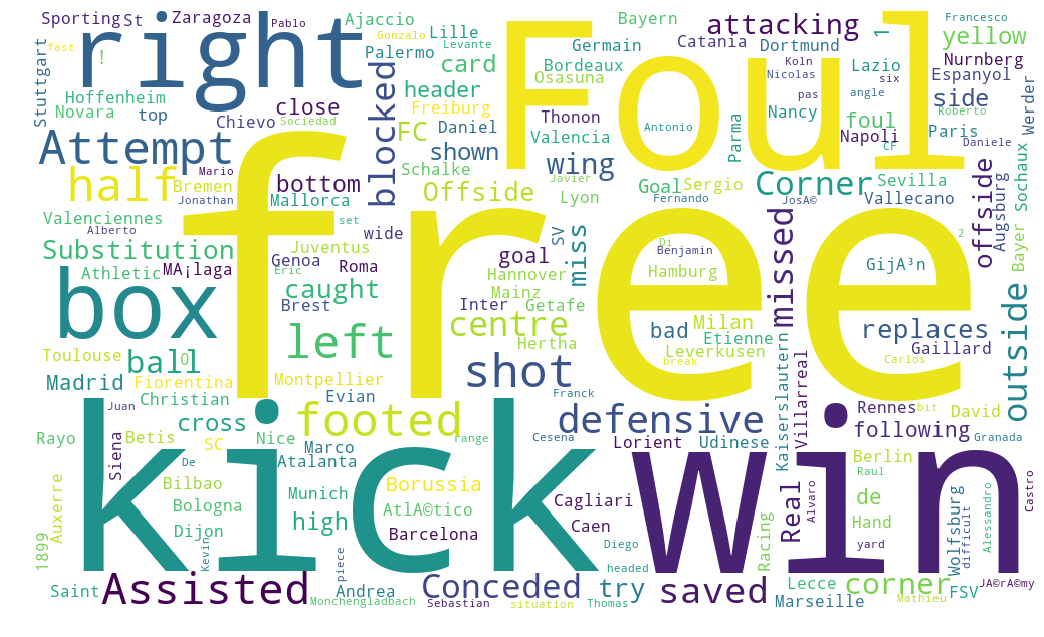

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# wordcloud
plt.figure(figsize=(18, 18))
wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fdist1))
plt.axis("off")
plt.show()

In [0]:
words_100 = fdist1.most_common(100)
words_100

[('free', 26774),
 ('kick', 26774),
 ('win', 26176),
 ('Foul', 25470),
 ('right', 24641),
 ('box', 20976),
 ('Attempt', 20415),
 ('half', 19575),
 ('shot', 19469),
 ('footed', 19460),
 ('left', 19320),
 ('Assisted', 16810),
 ('defensive', 13322),
 ('saved', 11366),
 ('blocked', 10448),
 ('outside', 9829),
 ('centre', 9789),
 ('missed', 9551),
 ('Corner', 9082),
 ('Conceded', 9079),
 ('ball', 7730),
 ('corner', 6994),
 ('wing', 6627),
 ('attacking', 6253),
 ('miss', 5741),
 ('FC', 5182),
 ('Real', 5139),
 ('Substitution', 5134),
 ('replaces', 5134),
 ('Offside', 5049),
 ('try', 5049),
 ('caught', 5049),
 ('offside', 5049),
 ('cross', 4418),
 ('side', 4398),
 ('card', 4286),
 ('shown', 4171),
 ('yellow', 4161),
 ('bottom', 3979),
 ('high', 3939),
 ('header', 3615),
 ('following', 3352),
 ('close', 3305),
 ('foul', 3161),
 ('de', 3150),
 ('1', 3065),
 ('goal', 3040),
 ('bad', 2943),
 ('Madrid', 2919),
 ('Borussia', 2595),
 ('Milan', 2543),
 ('Goal', 2378),
 ('!', 2363),
 ('top', 1859),
 (

In [0]:
words_50 = fdist1.most_common(50)
words_50

[('free', 26774),
 ('kick', 26774),
 ('win', 26176),
 ('Foul', 25470),
 ('right', 24641),
 ('box', 20976),
 ('Attempt', 20415),
 ('half', 19575),
 ('shot', 19469),
 ('footed', 19460),
 ('left', 19320),
 ('Assisted', 16810),
 ('defensive', 13322),
 ('saved', 11366),
 ('blocked', 10448),
 ('outside', 9829),
 ('centre', 9789),
 ('missed', 9551),
 ('Corner', 9082),
 ('Conceded', 9079),
 ('ball', 7730),
 ('corner', 6994),
 ('wing', 6627),
 ('attacking', 6253),
 ('miss', 5741),
 ('FC', 5182),
 ('Real', 5139),
 ('Substitution', 5134),
 ('replaces', 5134),
 ('Offside', 5049),
 ('try', 5049),
 ('caught', 5049),
 ('offside', 5049),
 ('cross', 4418),
 ('side', 4398),
 ('card', 4286),
 ('shown', 4171),
 ('yellow', 4161),
 ('bottom', 3979),
 ('high', 3939),
 ('header', 3615),
 ('following', 3352),
 ('close', 3305),
 ('foul', 3161),
 ('de', 3150),
 ('1', 3065),
 ('goal', 3040),
 ('bad', 2943),
 ('Madrid', 2919),
 ('Borussia', 2595)]

In [0]:
# if setence has word_50 -> count++
count_list = []
count = 0
for x in df[:100000].text:
    for y in words_50:
        if y[0] in x:
            count += 1
    count_list.append(count)
    count = 0
len(count_list)

100000

In [0]:
# make new df
df_sentence = pd.Series(count_list, name="count").to_frame()
df_sentence["text"] = df[:100000].text.tolist()
df_sentence.head()

,count,text
0,11,Attempt missed. Mladen Petric (Hamburg) left f...
1,4,"Corner, Borussia Dortmund. Conceded by Dennis..."
2,4,"Corner, Borussia Dortmund. Conceded by Heiko ..."
3,3,Foul by Sven Bender (Borussia Dortmund).
4,6,Gokhan Tore (Hamburg) wins a free kick in the ...


In [0]:
# sorting by count
df_sentence = df_sentence.sort_values(["count"], ascending=[False])

In [0]:
df_sentence.head()

,count,text
90496,19,Attempt missed. Mato Jajalo (1. FC Koln) right...
82567,18,Attempt missed. JosA© CallejA³n (Real Madrid) ...
36219,18,Attempt missed. Fernando Gago (Roma) right foo...
45159,18,Attempt missed. Cristiano Ronaldo (Real Madrid...
22916,18,Attempt missed. Andreas Beck (1899 Hoffenheim)...


In [0]:
df_sentence.text[0]

'Attempt missed. Mladen Petric (Hamburg) left footed shot from the left side of the box is high and wide to the left. Assisted by Gokhan Tore.'

In [0]:
df_sentence.text[1]

'Corner,  Borussia Dortmund. Conceded by Dennis Diekmeier.'

In [0]:
df_sentence.tail().text.tolist()[0]

'Own Goal by Souleymane Diawara, Marseille.  Marseille 2, Lyon 2.'

In [0]:
df_sentence.tail().text.tolist()[1]

'Own Goal by Omer Toprak, Bayer Leverkusen.  Hertha Berlin 2, Bayer Leverkusen 0.'

In [0]:
df_sentence.to_csv("/content/drive/My Drive/project/football-events/sentence_count_sort.csv")